In [1]:
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_transform = transforms.Compose([transforms.ToTensor()])

In [3]:
train_dataset = datasets.ImageFolder(root='./data/train/', transform=data_transform)

In [4]:
dataset_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)

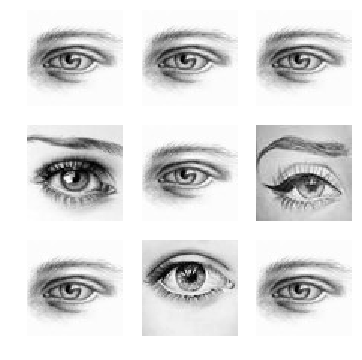

In [6]:
%matplotlib inline
first_batch, _ = next(iter(dataset_loader))  # retrieve the first batch
fig = plt.figure(figsize=(12, 6))
for row in range(1, 4):  # show 3 rows
    for col in range(1, 4):  # show 3 columns
        index = 6 * (row - 1) + col
        image = first_batch[index - 1, 0, :]  # retrieve images as (28, 28) tensors
        fig.add_subplot(3, 6, index)
        plt.imshow(image.numpy(), cmap='gray')
        plt.axis('off')
plt.show()

In [9]:
from torchsummary import summary
import torch 
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

In [8]:
!pip install torchsummary

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
class Generator(nn.Module):
    
    def __init__(self):
        super(Generator,self).__init__()
        self.DCV1 = nn.ConvTranspose2d(in_channels=100, out_channels=512, kernel_size=4, stride=1, padding=0)
        self.BN1  = nn.BatchNorm2d(512)
        self.DCV2 = nn.ConvTranspose2d(512, 256, 4, 2, 1)
        self.BN2  = nn.BatchNorm2d(256)
        self.DCV3 = nn.ConvTranspose2d(256, 128, 4, 2, 1)
        self.BN3  = nn.BatchNorm2d(128)
        self.DCV4 = nn.ConvTranspose2d(128, 64, 4, 2, 1)
        self.BN4  = nn.BatchNorm2d(64)
        self.DCV5 = nn.ConvTranspose2d(64, 3, 4, 2, 1)
        
    def forward(self, inputs):
        '''
        input size: (batch_size, 100, 1, 1)
        outputs size: (batch_size, 1, 64, 64)
        ''' 
        """ori=inputs[0][0].data.numpy()
        print ('original : ',ori.shape)
        plt.imshow(ori, cmap=plt.get_cmap('gray'))
        plt.show(),
        """        
        # Deconv 1
        x = self.DCV1(inputs)
        x = self.BN1(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        """intm=x[0][0].data.numpy()
        print (' Gen conv 2: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),"""
        
        # Deconv 2
        x = self.DCV2(x)
        x = self.BN2(x)
        x = F.leaky_relu(x, 0.2)
        """intm=x[0][0].data.numpy()
        print ('conv 2: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),"""
        
        # Deconv 3
        x = self.DCV3(x)
        x = self.BN3(x)
        x = F.leaky_relu(x, 0.2)
        """intm=x[0][0].data.numpy()
        print ('conv 2: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),"""
        
        # Deconv 4
        x = self.DCV4(x)
        x = self.BN4(x)
        x = F.leaky_relu(x, 0.2)
        """intm=x[0][0].data.numpy()
        print ('Gen conv 4: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),"""
        
        # Deconv 5 + output
        x = self.DCV5(x)
        outputs = F.tanh(x)
        return outputs

In [12]:
class Discriminator(nn.Module):
    
    def __init__(self):
        super(Discriminator,self).__init__()
        self.CV1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=4, stride=2, padding=1)
        self.CV2 = nn.Conv2d(64, 128, 4, 2, 1)
        self.BN2 = nn.BatchNorm2d(num_features=128)
        self.CV3 = nn.Conv2d(128, 256, 4, 2, 1)
        self.BN3 = nn.BatchNorm2d(256)
        self.CV4 = nn.Conv2d(256, 512, 4, 2, 1)
        self.BN4 = nn.BatchNorm2d(512)
        self.CV5 = nn.Conv2d(512, 1, 4)

    def forward(self, inputs):
        '''
        input size: (batch_size, 3, 64, 64)
        outputs size: (batch_size, 1)
        '''
        """ori=inputs[0][0].data.numpy()
        print ('original : ',ori.shape)
        plt.imshow(ori, cmap=plt.get_cmap('gray'))
        plt.show(),"""
        
        # Conv 1
        x = self.CV1(inputs)
        x = F.leaky_relu(x, negative_slope=0.2)
        """intm=x[0][0].data.numpy()
        print ('conv 2: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),"""
        
        # Conv 2
        x = self.CV2(x)
        x = self.BN2(x)
        x = F.leaky_relu(x, 0.2)
        """intm=x[0][0].data.numpy()
        print ('conv 2: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),"""
        
        # Conv 3
        x = self.CV3(x)
        x = self.BN3(x)
        x = F.leaky_relu(x, 0.2)
        """intm=x[0][0].data.numpy()
        print ('conv 2: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),"""
        
        # Conv 4
        x = self.CV4(x)
        x = self.BN4(x)
        x = F.leaky_relu(x, 0.2)
        """intm=x[0][0].data.numpy()
        print ('conv 2: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),"""
        
        # Conv 5 + output
        x = self.CV5(x)
        outputs = F.sigmoid(x) # at this point outputs has size (batch_size, 1, 1, 1) need to resize!
        outputs = outputs.view(-1, 1)  # resize to (batch_size, 1)
        return outputs

In [13]:
# def model
G = Generator()#.cuda()
D = Discriminator()#.cuda()

# def Adam optimizer
G_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)
D_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)

# loss
criterion = nn.BCELoss()

In [14]:
print(summary(D, (3, 64, 64)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]            3136
            Conv2d-2          [-1, 128, 16, 16]          131200
       BatchNorm2d-3          [-1, 128, 16, 16]             256
            Conv2d-4            [-1, 256, 8, 8]          524544
       BatchNorm2d-5            [-1, 256, 8, 8]             512
            Conv2d-6            [-1, 512, 4, 4]         2097664
       BatchNorm2d-7            [-1, 512, 4, 4]            1024
            Conv2d-8              [-1, 1, 1, 1]            8193
Total params: 2766529
Trainable params: 2766529
Non-trainable params: 0
----------------------------------------------------------------
None


In [15]:
print(summary(G, (100, 64, 64)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1          [-1, 512, 67, 67]          819712
       BatchNorm2d-2          [-1, 512, 67, 67]            1024
   ConvTranspose2d-3        [-1, 256, 134, 134]         2097408
       BatchNorm2d-4        [-1, 256, 134, 134]             512
   ConvTranspose2d-5        [-1, 128, 268, 268]          524416
       BatchNorm2d-6        [-1, 128, 268, 268]             256
   ConvTranspose2d-7         [-1, 64, 536, 536]          131136
       BatchNorm2d-8         [-1, 64, 536, 536]             128
   ConvTranspose2d-9        [-1, 3, 1072, 1072]            3075
Total params: 3577667
Trainable params: 3577667
Non-trainable params: 0
----------------------------------------------------------------
None


In [16]:
batch_size = 16
# label tensors to compute BCE loss
#real_labels = Variable(torch.ones(real_images.size()[0], 1))
#fake_labels = Variable(torch.zeros(real_images.size()[0], 1))
#print (real_labels, fake_labels)

In [17]:
def train_D(real_images, real_labels, fake_labels):
    # sample real images from dataset, wrap in Variable
    real_images = Variable(real_images)

    # sample fake images from generator
    noise = Variable(torch.randn(real_images.size()[0], 100, 1, 1))
    fake_images = G.forward(noise)

    # forward prop
    real_outputs = D.forward(real_images)
    fake_outputs = D.forward(fake_images)

    # D optimizer grad
    D_optimizer.zero_grad()

    # loss formula , backprop and update params
    D_loss = criterion(real_outputs, real_labels) + criterion(fake_outputs, fake_labels)
    # backprop
    D_loss.backward()
    # update params
    D_optimizer.step()
    
    return D_loss.data[0]  # return the loss of this minibatch

In [18]:
def train_G(real_labels, fake_labels):
    # sample fake images
    noise = Variable(torch.randn(real_labels.size()[0], 100, 1, 1))
    fake_images = G.forward(noise)

    # foward prop
    fake_outputs = D.forward(fake_images)

    # G optimizer grad
    G_optimizer.zero_grad()
            
    # loss formaula
    G_loss = criterion(fake_outputs, real_labels)
    # backprop  
    G_loss.backward()
    # update params
    G_optimizer.step()
    
    return G_loss.data[0]

In [19]:
# use to evaluate model: see how fake images improve over the epochs
def plot_fake_images(rows, cols):
    # generate (rows * cols) fake images
    noise = Variable(torch.randn(rows * cols, 100, 1, 1))
    fake_images = G.forward(noise)
    
    fig = plt.figure(figsize=(2 * cols, 2 * rows))
    for row in range(1, rows + 1):
        for col in range(1, cols + 1):
            index = cols * (row - 1) + col
            image = fake_images[index - 1, 0, :, :]  # get images as dim tensors

            fig.add_subplot(rows, cols, index)
            plt.imshow(image.data.numpy(), cmap='gray')
            plt.axis('off')
        
    plt.show()
    return

In [23]:
epoch_max=40
def train(epoch_max, batch_size):
    # logger recording the average batch loss per each epoch
    G_log = []
    D_log = []
    
    for epoch in range(epoch_max):
        # logger recording the losses for each minibatch in this epoch
        G_batch_loss = []
        D_batch_loss = []
        
        for batch, (real_images, _) in enumerate(dataset_loader):  # enumerate through minibatches
            
            #print('mini-batch : ' + str(batch))
            # generate labels to min-batch_size
            real_labels = Variable(torch.ones(real_images.size()[0], 1))
            fake_labels = Variable(torch.zeros(real_images.size()[0], 1))
            
            # train discriminator
            D_loss = train_D(real_images, real_labels, fake_labels)
            
            # train generator
            G_loss = train_G(real_labels, fake_labels)
        
            # add batch losses to logger
            D_batch_loss.append(D_loss)
            G_batch_loss.append(G_loss)
            
        # compute average loss of this epoch
        G_log.append(sum(G_batch_loss) / len(G_batch_loss))
        D_log.append(sum(D_batch_loss) / len(D_batch_loss))
        
        # for selected epochs, show 5 generated images
        #epoch_list = [0, 1, 2, 4, 7, 12, 19]
        #if epoch in epoch_list:
        print('Epoch %d, G_loss: %.3f, D_loss = %.3f' % \
              (epoch , G_log[epoch], D_log[epoch]))
        plot_fake_images(1, 6)

    return G_log, D_log

Epoch 0, G_loss: 4.504, D_loss = 0.080


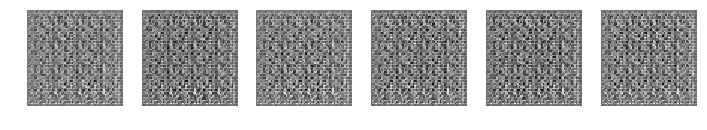

Epoch 1, G_loss: 5.356, D_loss = 0.045


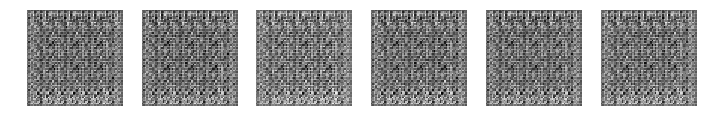

Epoch 2, G_loss: 5.988, D_loss = 0.021


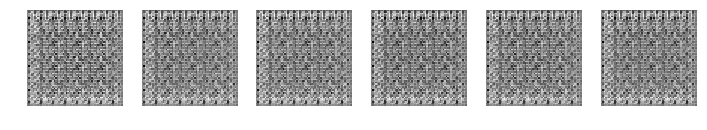

Epoch 3, G_loss: 6.398, D_loss = 0.020


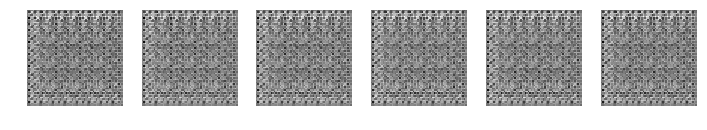

Epoch 4, G_loss: 6.252, D_loss = 0.012


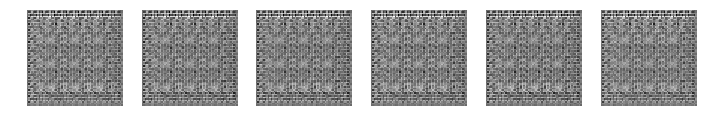

Epoch 5, G_loss: 6.278, D_loss = 0.007


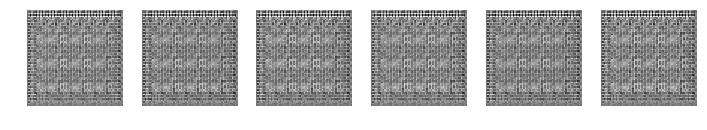

Epoch 6, G_loss: 6.486, D_loss = 0.006


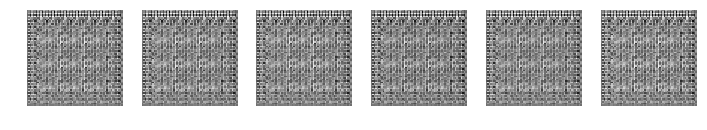

Epoch 7, G_loss: 6.631, D_loss = 0.007


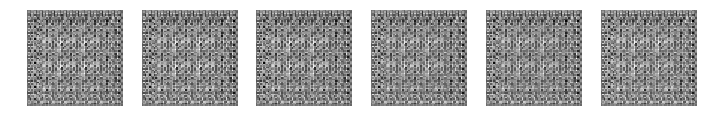

Epoch 8, G_loss: 6.831, D_loss = 0.005


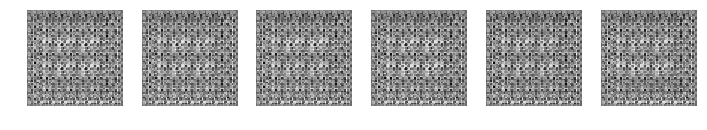

Epoch 9, G_loss: 6.822, D_loss = 0.004


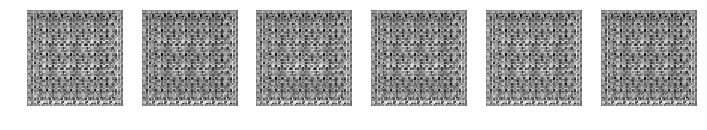

Epoch 10, G_loss: 7.377, D_loss = 0.003


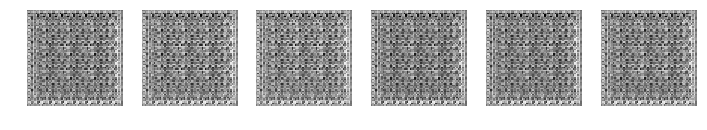

Epoch 11, G_loss: 7.151, D_loss = 0.004


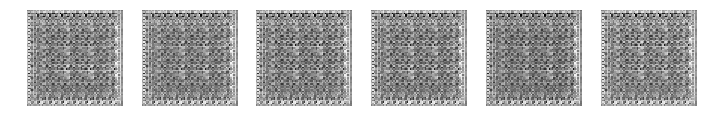

Epoch 12, G_loss: 7.504, D_loss = 0.003


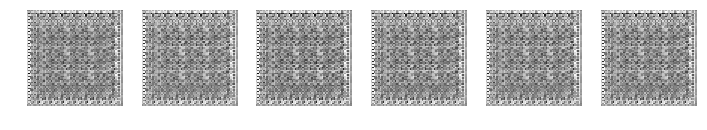

Epoch 13, G_loss: 7.187, D_loss = 0.003


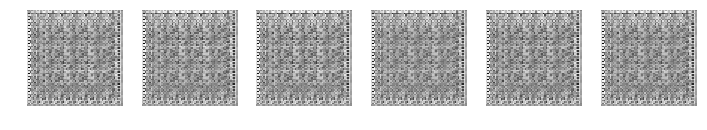

Epoch 14, G_loss: 7.324, D_loss = 0.002


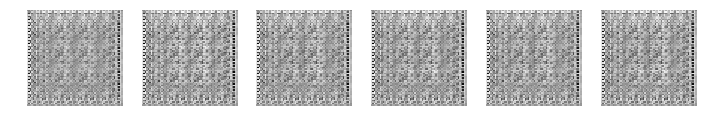

Epoch 15, G_loss: 7.481, D_loss = 0.002


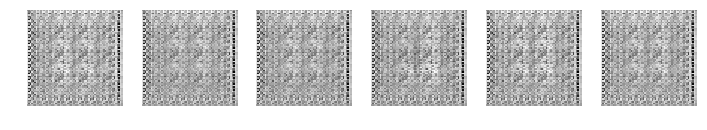

Epoch 16, G_loss: 7.467, D_loss = 0.002


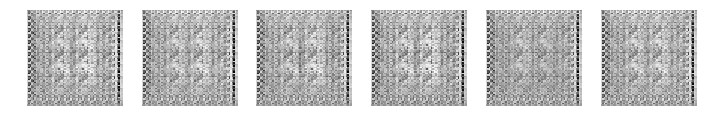

Epoch 17, G_loss: 7.764, D_loss = 0.002


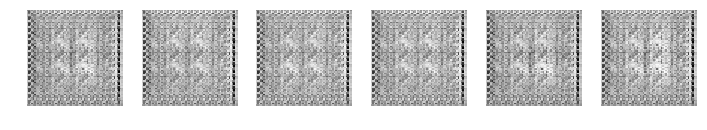

Epoch 18, G_loss: 7.731, D_loss = 0.002


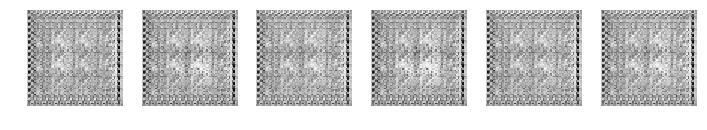

Epoch 19, G_loss: 7.531, D_loss = 0.002


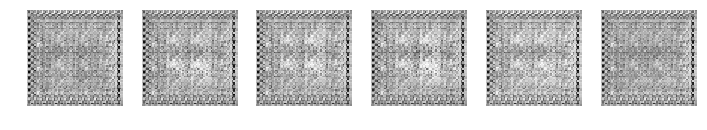

Epoch 20, G_loss: 7.459, D_loss = 0.003


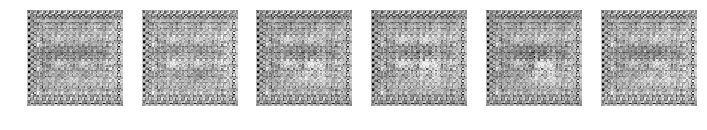

Epoch 21, G_loss: 7.809, D_loss = 0.003


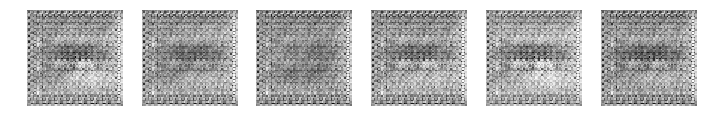

Epoch 22, G_loss: 7.321, D_loss = 0.003


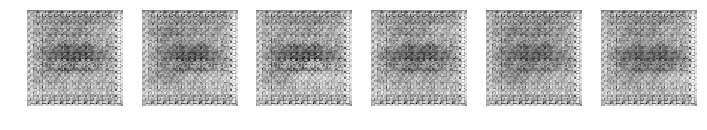

Epoch 23, G_loss: 7.134, D_loss = 0.007


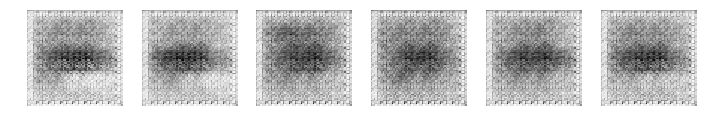

Epoch 24, G_loss: 10.376, D_loss = 1.111


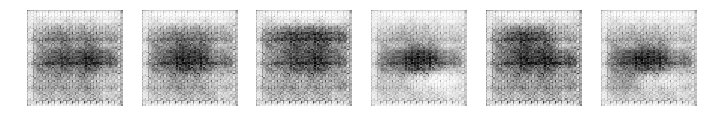

Epoch 25, G_loss: 4.767, D_loss = 0.110


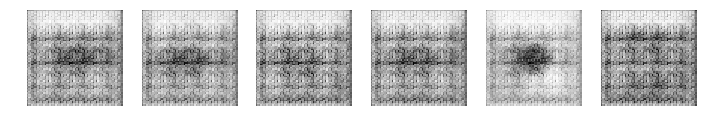

Epoch 26, G_loss: 4.973, D_loss = 0.222


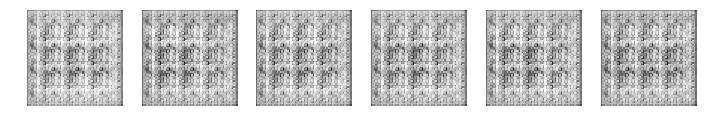

Epoch 27, G_loss: 5.559, D_loss = 0.128


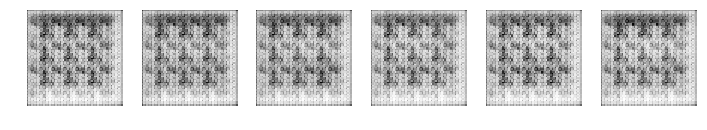

Epoch 28, G_loss: 6.234, D_loss = 0.049


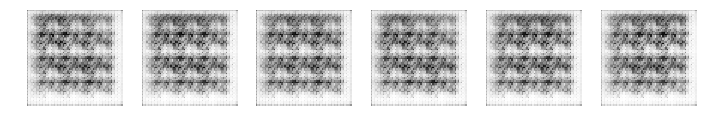

Epoch 29, G_loss: 5.589, D_loss = 0.056


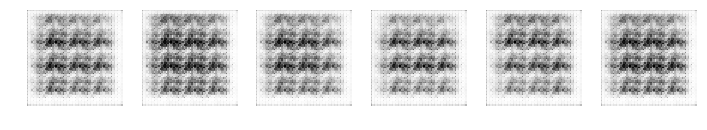

Epoch 30, G_loss: 5.996, D_loss = 0.026


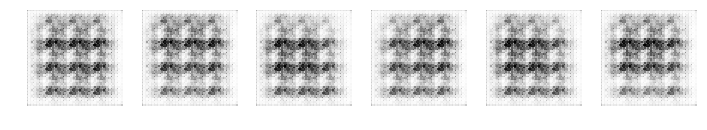

Epoch 31, G_loss: 6.389, D_loss = 0.019


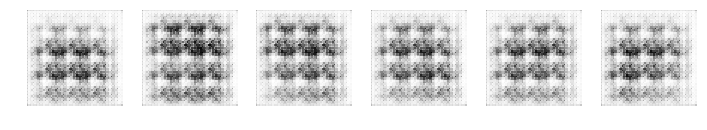

Epoch 32, G_loss: 6.320, D_loss = 0.052


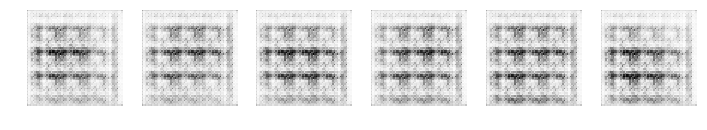

Epoch 33, G_loss: 6.432, D_loss = 0.024


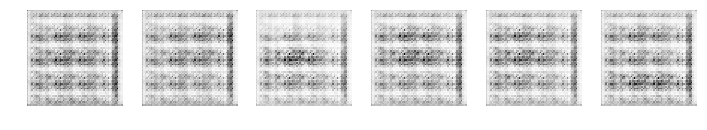

Epoch 34, G_loss: 6.111, D_loss = 0.021


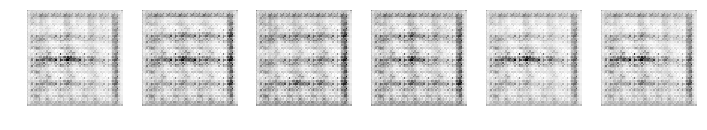

Epoch 35, G_loss: 5.132, D_loss = 0.049


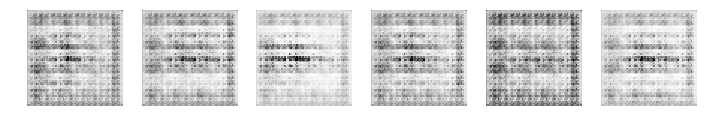

Epoch 36, G_loss: 5.761, D_loss = 0.022


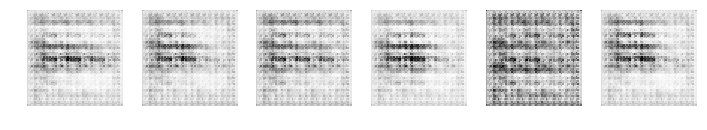

Epoch 37, G_loss: 5.592, D_loss = 0.029


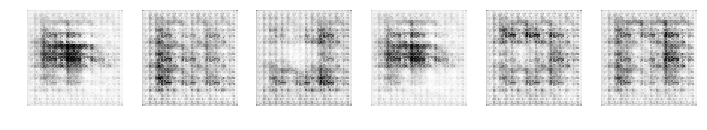

Epoch 38, G_loss: 6.420, D_loss = 0.196


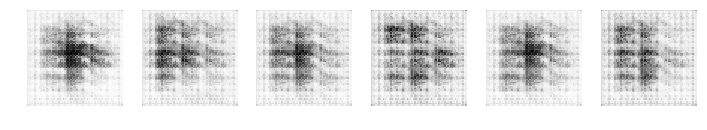

Epoch 39, G_loss: 8.780, D_loss = 0.025


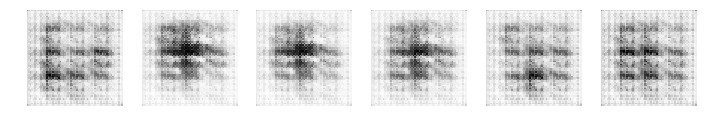

Total time used: 563 seconds


In [24]:
# record time used
from time import time
start_time = time()
G_log, D_log = train(epoch_max, batch_size)
elapsed_time = time() - start_time
print('Total time used: %d seconds' % elapsed_time)

In [25]:
def plot_learning_curve(G_log, D_log):
    plt.figure(figsize=(10, 6))
    plt.plot(G_log, color='green',  linewidth=2.5, linestyle='-', label='G loss')
    plt.plot(D_log, color='yellow', linewidth=2.5, linestyle='-', label='D loss')
    plt.legend(loc='upper right',frameon=True)
    return

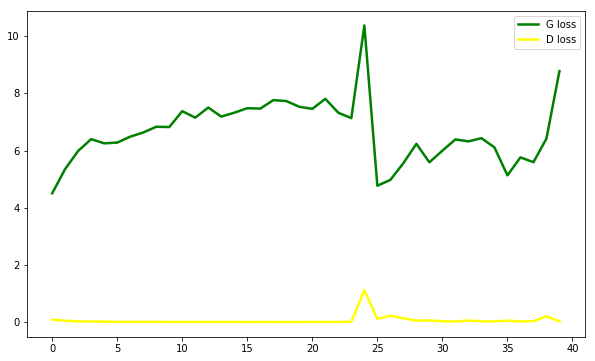

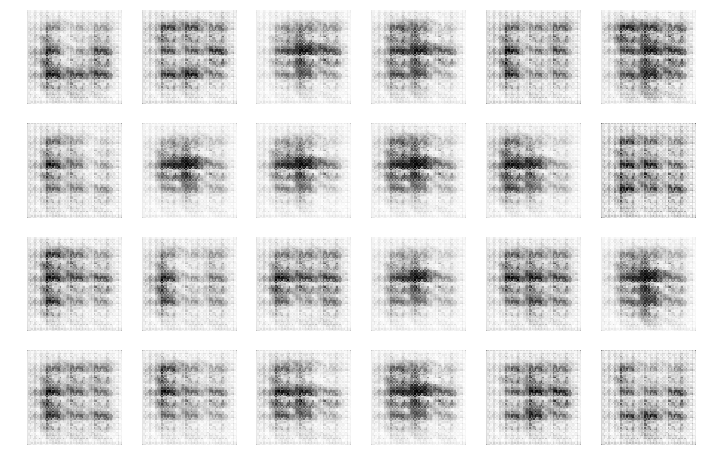

In [26]:
plot_learning_curve(G_log, D_log)
plot_fake_images(4, 6)